<h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#000;" align="center">SCHOOL DROPOUT IN SOGAMOSO</h1>
<p style="width: 100%; text-align: center; margin: 0px; padding: 0px; font-size: 24px; color:#000;" align="center">| EDA Notebook |</p>
<p style="width: 100%; text-align: center; margin: 0px; padding: 0px; font-size: 20px; color:#000;" align="center">Correlation One - DS4A</p>
<p style="text-align:center;">This notebook contains the <b>MODELING</b> of the machine learning algorithms based on the selected features.</p>

## 1. Libraries

In [1]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-learn ligrary
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (train_test_split, StratifiedKFold,
                                    KFold, HalvingGridSearchCV)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import (StandardScaler, OneHotEncoder,
                                   OrdinalEncoder, FunctionTransformer)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

## Own specific functions 
from functions import *

In [ ]:
#!pip install --user imbalanced-learn==0.9.1


## 2. Importing files

In [2]:
df_students = pd.read_csv("datasets/df_students.csv")

In [3]:
df_analysis(df_students, key_columns=["PER_ID_ANO"], analysis_type="complete")


Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 311866 rows and 35 columns
- Total of NaN values:			 0
- Total of infinite values:		 0
- Total of empty columns:		 0
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 True
- Memory usage:				 83.3+ MB

- The key(s):	 ['PER_ID_ANO'] is not present multiple times in the dataframe. 
		 It CAN be used as a primary key.


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,ANO,int64,311866,10,0,0.00000,2017.44093,2013.00000,2015.00000,2017.00000,2020.00000,2022.00000,2.88220
26,INSTITUCION_NIVEL_MEDIA,int64,311866,2,0,0.00000,0.94293,0.00000,1.00000,1.00000,1.00000,1.00000,0.23198
20,INSTITUCION_LATITUDE,float64,311866,76,0,0.00000,5.71590,5.61974,5.70473,5.71505,5.72353,5.75943,0.02154
21,INSTITUCION_LONGITUD,float64,311866,76,0,0.00000,-72.92979,-72.96245,-72.93943,-72.93211,-72.92435,-72.88859,0.01313
22,INSTITUCION_PRESTADOR_DE_SERVICIO,object,311866,4,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,INSTITUCION_TAMAÑO,object,311866,3,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,INSTITUCION_NIVEL_BASICA_PRIMARIA,int64,311866,2,0,0.00000,0.98260,0.00000,1.00000,1.00000,1.00000,1.00000,0.13076
25,INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA,int64,311866,2,0,0.00000,0.94667,0.00000,1.00000,1.00000,1.00000,1.00000,0.22470
27,INSTITUCION_NIVEL_PREESCOLAR,int64,311866,2,0,0.00000,0.96091,0.00000,1.00000,1.00000,1.00000,1.00000,0.19382
18,INSTITUCION_NUMERO_DE_SEDES,float64,311866,8,0,0.00000,3.36785,1.00000,1.00000,3.00000,5.00000,8.00000,2.31163


## 3. Analyzing target variable

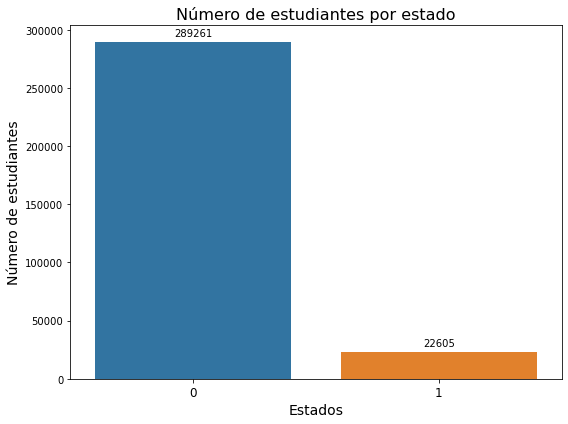

In [4]:
fig, ax1 = plt.subplots(figsize=(8, 6))
plot = sns.barplot(x=df_students["ESTADO"].value_counts(ascending=False).index, 
                   y=df_students["ESTADO"].value_counts(ascending=False))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["ESTADO"].value_counts(ascending=False).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por estado", size=16)
plt.xlabel("Estados", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
    <p><b>Observations</b></p>
    <p>Based on the plot, we can say that we are facing an imbalanced classification problem</p>

</div>

## 4. Splitting data

First of all, we are going to separate the data to predict (2022) from the data to do the training (from 2013 to 2021)

In [5]:
df_students=df_students.groupby('ESTADO', group_keys=False).apply(lambda x: x.sample(frac=0.02))
df_students.shape

(6237, 35)

In [6]:
df_students_2022 = df_students[df_students["ANO"]==2022].copy()
df_students_2022["ESTADO"] = np.NaN

df_students = df_students[df_students["ANO"]!=2022].copy()

Now, we are let's identify the training columns in the dataset

In [7]:
NOT_TRAINING_COLUMNS = [
    "ESTADO", "ANO", "PER_ID_ANO", "PER_ID", "INSTITUCION_LATITUDE", "INSTITUCION_LONGITUD",
]

TRAINING_COLUMNS = [col for col in df_students if col not in NOT_TRAINING_COLUMNS]

Let's proced to split the data

In [8]:
X = df_students[TRAINING_COLUMNS].copy()

In [9]:
y_target = df_students.loc[:, "ESTADO"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2,
                                                    stratify=y_target, random_state=42)

In [11]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print(30*"-")
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (4485, 29)
y_train: (4485,)
------------------------------
X_test: (1122, 29)
y_test: (1122,)


## 5. Data preprocessing

In [12]:
def boolean_transformation(X):
    return X.astype(int)

In [13]:
X_train.columns

Index(['INSTITUCION', 'EDAD', 'GENERO', 'GRADO_COD', 'JORNADA', 'ESTRATO',
       'PAIS_ORIGEN', 'DISCAPACIDAD', 'SRPA', 'INSTITUCION_SECTOR',
       'INSTITUCION_MODELO', 'INSTITUCION_APOYO_ACADEMICO_ESPECIAL',
       'INSTITUCION_ZONA', 'INSTITUCION_CARACTER',
       'INSTITUCION_NUMERO_DE_SEDES', 'INSTITUCION_ESTADO',
       'INSTITUCION_PRESTADOR_DE_SERVICIO', 'INSTITUCION_TAMAÑO',
       'INSTITUCION_NIVEL_BASICA_PRIMARIA',
       'INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA', 'INSTITUCION_NIVEL_MEDIA',
       'INSTITUCION_NIVEL_PREESCOLAR', 'INSTITUCION_NIVEL_PRIMERA_INFANCIA',
       'INSTITUCION_ESPECIALIDAD_ACADÉMICA',
       'INSTITUCION_ESPECIALIDAD_AGROPECUARIO',
       'INSTITUCION_ESPECIALIDAD_COMERCIAL',
       'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
       'INSTITUCION_ESPECIALIDAD_NO_APLICA', 'INSTITUCION_ESPECIALIDAD_OTRO'],
      dtype='object')

In [14]:
CATEGORICAL_FEATURES = [
    "INSTITUCION", "GENERO", "JORNADA", "PAIS_ORIGEN", "DISCAPACIDAD", "SRPA", "INSTITUCION_SECTOR",
    "INSTITUCION_MODELO", "INSTITUCION_APOYO_ACADEMICO_ESPECIAL", "INSTITUCION_ZONA", "INSTITUCION_CARACTER",
    "INSTITUCION_ESTADO", "INSTITUCION_PRESTADOR_DE_SERVICIO", 
]
ORDINAL_FEATURES = [
    "GRADO_COD", "ESTRATO", "INSTITUCION_TAMAÑO"
]
NUMERICAL_FEATURES = [
    "EDAD", "INSTITUCION_NUMERO_DE_SEDES"
]
BOOLEAN_FEATURES = [
    "INSTITUCION_NIVEL_BASICA_PRIMARIA", "INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA", "INSTITUCION_NIVEL_MEDIA",
    "INSTITUCION_NIVEL_PREESCOLAR", "INSTITUCION_NIVEL_PRIMERA_INFANCIA", "INSTITUCION_ESPECIALIDAD_ACADÉMICA", 
    "INSTITUCION_ESPECIALIDAD_AGROPECUARIO", "INSTITUCION_ESPECIALIDAD_COMERCIAL", 
    "INSTITUCION_ESPECIALIDAD_INDUSTRIAL", "INSTITUCION_ESPECIALIDAD_NO_APLICA",
    "INSTITUCION_ESPECIALIDAD_OTRO"
]

In [15]:
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[
    [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0],
    ['ESTRATO 0', 'ESTRATO 1', 'ESTRATO 2', 'ESTRATO 3', 'ESTRATO 4', 'ESTRATO 5', 'ESTRATO 6'],
    ['Pequeña', 'Mediana',  'Grande']
]))

numerical_pipeline = make_pipeline(StandardScaler())

boolean_pipeline = make_pipeline(FunctionTransformer(boolean_transformation))

In [16]:
preprocessor = make_column_transformer(
    (categorical_pipeline, CATEGORICAL_FEATURES),
    (ordinal_pipeline, ORDINAL_FEATURES),
    (numerical_pipeline, NUMERICAL_FEATURES),
    (boolean_pipeline, BOOLEAN_FEATURES)
)

## 6. Random Forest

In [17]:
rfm = RandomForestClassifier(class_weight="balanced")

In [18]:
clf = make_pipeline(preprocessor, rfm)

In [19]:
sorted(clf.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__ordinalencoder',
 'columntransformer__pipeline-2__ordinalencoder__categories',
 'columntransformer__pipeline-2__ordinalencoder__dtype',
 'columntransformer__pipeline-2__ordinalencoder__encoded_missing_value'

In [20]:
param_grid = {
    "randomforestclassifier__n_estimators" : np.arange(500, 900, 100),
    "randomforestclassifier__max_depth" : np.arange(20, 30, 2)
}

We are going to use Stratified K-Folds cross-validator to ensure that each fold of dataset has the same proportion of observations with a given label

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [21]:
search = HalvingGridSearchCV(clf, param_grid, scoring="roc_auc",
                             cv=3, n_jobs=-2)

In [22]:
search.fit(X_train, y_train)

HalvingGridSearchCV(cv=3,
                    estimator=Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                Pipeline(steps=[('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['INSTITUCION',
                                                                                 'GENERO',
                                                                                 'JORNADA',
                                                                                 'PAIS_ORIGEN',
                                                                                 'DISCAPACIDAD',
                                                                                 'SRPA',
                                                                                 'INSTITUCION_SECTOR',
                                                                                 'INSTITUCION_MODELO',
                                                                                 'INSTITUCION_APOYO_ACADEMICO_ESPECIAL',
                                                                                 'INSTI...
                                                                                 'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
                                                                                 'INSTITUCION_ESPECIALIDAD_NO_APLICA',
                                                                                 'INSTITUCION_ESPECIALIDAD_OTRO'])])),
                                              ('randomforestclassifier',
                                               RandomForestClassifier(class_weight='balanced'))]),
                    n_jobs=-2,
                    param_grid={'randomforestclassifier__max_depth': array([20, 22, 24, 26, 28]),
                                'randomforestclassifier__n_estimators': array([500, 600, 700, 800])},
                    scoring='roc_auc')

In [23]:
search.best_params_

{'randomforestclassifier__max_depth': 26,
 'randomforestclassifier__n_estimators': 800}

In [24]:
search.best_score_

0.6867227928480074

In [52]:
rfm_test = RandomForestClassifier(max_depth=20, n_estimators=600,
                                  class_weight="balanced",
                                  random_state=42,
                                  n_jobs=-1)

In [53]:
clf_test = make_pipeline(preprocessor, rfm_test)

In [54]:
clf_test.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['INSTITUCION', 'GENERO',
                                                   'JORNADA', 'PAIS_ORIGEN',
                                                   'DISCAPACIDAD', 'SRPA',
                                                   'INSTITUCION_SECTOR',
                                                   'INSTITUCION_MODELO',
                                                   'INSTITUCION_APOYO_ACADEMICO_ESPECIAL',
                                                   'INSTITUCION_ZONA',
                                                   'INSTITUCION_CARACTER'...
                                                   'INSTITUCION_ESPECIALIDAD_ACADÉMICA',
                                                   'INSTITUCION_ESPECIALIDAD_AGROPECUARIO',
                                                   'INSTITUCION_ESPECIALIDAD_COMERCIAL',
                                                   'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
                                                   'INSTITUCION_ESPECIALIDAD_NO_APLICA',
                                                   'INSTITUCION_ESPECIALIDAD_OTRO'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        n_estimators=600, n_jobs=-1,
                                        random_state=42))])

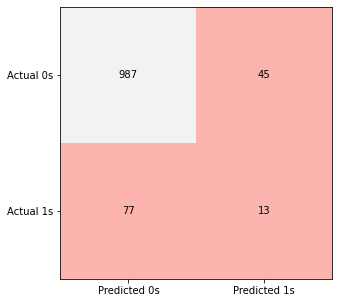

In [55]:
crfm = confusion_matrix(y_test, clf_test.predict(X_test))

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(crfm,cmap ='Pastel1')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, crfm[i, j], ha='center', va='center', color='black')
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score, classification_report
print(classification_report(y_test, clf_test.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1032
           1       0.22      0.14      0.18        90

    accuracy                           0.89      1122
   macro avg       0.58      0.55      0.56      1122
weighted avg       0.87      0.89      0.88      1122



In [57]:
roc_auc_score(y_test, clf_test.predict(X_test))

0.5504198966408268

Now we will try to balance the classes with the library: imbalanced-learn taking into account the same variables of the previous model.

In [58]:
imbpipeline_clf = imbpipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE()),
    ("rfm_imblearn", RandomForestClassifier(max_depth=20, 
                                            n_estimators=600,
                                            random_state=42,
                                            n_jobs=-1)
    )
])

In [59]:
imbpipeline_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['INSTITUCION', 'GENERO',
                                                   'JORNADA', 'PAIS_ORIGEN',
                                                   'DISCAPACIDAD', 'SRPA',
                                                   'INSTITUCION_SECTOR',
                                                   'INSTITUCION_MODELO',
                                                   'INSTITUCION_APOYO_ACADEMICO_ESPECIAL',
                                                   'INSTITUCION_ZONA',
                                                   'INSTITUCION_CARACTER',
                                                   'INS...
                                                   'INSTITUCION_NIVEL_PRIMERA_INFANCIA',
                                                   'INSTITUCION_ESPECIALIDAD_ACADÉMICA',
                                                   'INSTITUCION_ESPECIALIDAD_AGROPECUARIO',
                                                   'INSTITUCION_ESPECIALIDAD_COMERCIAL',
                                                   'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
                                                   'INSTITUCION_ESPECIALIDAD_NO_APLICA',
                                                   'INSTITUCION_ESPECIALIDAD_OTRO'])])),
                ('smote', SMOTE()),
                ('rfm_imblearn',
                 RandomForestClassifier(max_depth=20, n_estimators=600,
                                        n_jobs=-1, random_state=42))])

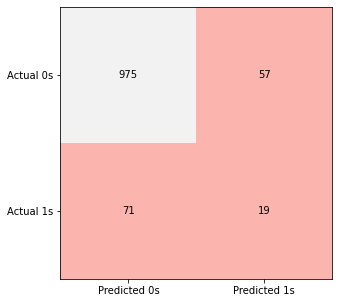

In [61]:
crfmi = confusion_matrix(y_test, imbpipeline_clf.predict(X_test))

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(crfmi,cmap ='Pastel1')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, crfmi[i, j], ha='center', va='center', color='black')
plt.show()

In [62]:
from sklearn.metrics import roc_auc_score, classification_report
print(classification_report(y_test, imbpipeline_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1032
           1       0.25      0.21      0.23        90

    accuracy                           0.89      1122
   macro avg       0.59      0.58      0.58      1122
weighted avg       0.88      0.89      0.88      1122



In [63]:
roc_auc_score(y_test, imbpipeline_clf.predict(X_test))

0.577939276485788

A logistic will also be tested with the same variables of the previous Random Forest

## 7. Logistic Regresion

In [67]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(class_weight="balanced")

In [68]:
clr = make_pipeline(preprocessor, lr)

In [69]:
sorted(clr.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__ordinalencoder',
 'columntransformer__pipeline-2__ordinalencoder__categories',
 'columntransformer__pipeline-2__ordinalencoder__dtype',
 'columntransformer__pipeline-2__ordinalencoder__encoded_missing_value'

In [107]:
solver==['newton-cg', 'lbfgs','liblinear']
penalty==['l1','l2']
param_grid = {
    "logisticregressioncv__solver" : solver,
    "logisticregressioncv__penalty": penalty
}

In [87]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [108]:
search = HalvingGridSearchCV(lr, param_grid, scoring="roc_auc",
                             cv=3, n_jobs=-2)

In [109]:
search.fit(X_train, y_train)

ValueError: Invalid parameter 'logisticregressioncv' for estimator LogisticRegressionCV(class_weight='balanced'). Valid parameters are: ['Cs', 'class_weight', 'cv', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratios', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'refit', 'scoring', 'solver', 'tol', 'verbose'].

In [ ]:
search.best_params_

In [ ]:
search.best_score_

In [ ]:
lr_test = LogisticRegressionCV(solver='liblinear',
                                  class_weight="balanced",
                                  random_state=42,
                                  n_jobs=-1)

In [ ]:
lr_test = make_pipeline(preprocessor, lr_test)

In [ ]:
lr_test.fit(X_train, y_train)

In [ ]:
clr = confusion_matrix(y_test, lr_test.predict(X_test))

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(clr,cmap ='Pastel1')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, clr[i, j], ha='center', va='center', color='black')
plt.show()

In [ ]:
print(classification_report(y_test, lr_test.predict(X_test)))

In [ ]:
roc_auc_score(y_test, lr_test.predict(X_test))

## 8. GBM

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [112]:
cgbc = make_pipeline(preprocessor, gbc)

In [113]:
sorted(cgbc.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__ordinalencoder',
 'columntransformer__pipeline-2__ordinalencoder__categories',
 'columntransformer__pipeline-2__ordinalencoder__dtype',
 'columntransformer__pipeline-2__ordinalencoder__encoded_missing_value'

In [129]:
param_grid = {
    "gradientboostingclassifier__n_estimators" : np.arange(5, 10, 500),
    "gradientboostingclassifier__max_depth": np.arange( 3, 5, 15),
    "gradientboostingclassifier__learning_rate": np.arange(0.01, 0.1,  10)
}

In [130]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [133]:
search = HalvingGridSearchCV(cgbc, param_grid, scoring="roc_auc",
                             cv=3, n_jobs=-2)

In [134]:
search.fit(X_train, y_train)

HalvingGridSearchCV(cv=3,
                    estimator=Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                Pipeline(steps=[('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['INSTITUCION',
                                                                                 'GENERO',
                                                                                 'JORNADA',
                                                                                 'PAIS_ORIGEN',
                                                                                 'DISCAPACIDAD',
                                                                                 'SRPA',
                                                                                 'INSTITUCION_SECTOR',
                                                                                 'INSTITUCION_MODELO',
                                                                                 'INSTITUCION_APOYO_ACADEMICO_ESPECIAL',
                                                                                 'INSTI...
                                                                                 'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
                                                                                 'INSTITUCION_ESPECIALIDAD_NO_APLICA',
                                                                                 'INSTITUCION_ESPECIALIDAD_OTRO'])])),
                                              ('gradientboostingclassifier',
                                               GradientBoostingClassifier())]),
                    n_jobs=-2,
                    param_grid={'gradientboostingclassifier__learning_rate': array([0.01]),
                                'gradientboostingclassifier__max_depth': array([3]),
                                'gradientboostingclassifier__n_estimators': array([5])},
                    scoring='roc_auc')

In [135]:
search.best_params_

{'gradientboostingclassifier__learning_rate': 0.01,
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__n_estimators': 5}

In [136]:
search.best_score_

0.665949384275466

In [141]:
gbc_test = GradientBoostingClassifier(learning_rate=0.01,max_depth= 3,n_estimators=5, random_state = 42)

In [142]:
gbc_test = make_pipeline(preprocessor, gbc_test)

In [143]:
gbc_test.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['INSTITUCION', 'GENERO',
                                                   'JORNADA', 'PAIS_ORIGEN',
                                                   'DISCAPACIDAD', 'SRPA',
                                                   'INSTITUCION_SECTOR',
                                                   'INSTITUCION_MODELO',
                                                   'INSTITUCION_APOYO_ACADEMICO_ESPECIAL',
                                                   'INSTITUCION_ZONA',
                                                   'INSTITUCION_CARACTER'...
                                                   'INSTITUCION_NIVEL_PRIMERA_INFANCIA',
                                                   'INSTITUCION_ESPECIALIDAD_ACADÉMICA',
                                                   'INSTITUCION_ESPECIALIDAD_AGROPECUARIO',
                                                   'INSTITUCION_ESPECIALIDAD_COMERCIAL',
                                                   'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
                                                   'INSTITUCION_ESPECIALIDAD_NO_APLICA',
                                                   'INSTITUCION_ESPECIALIDAD_OTRO'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, n_estimators=5,
                                            random_state=42))])

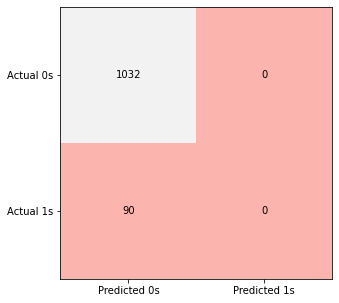

In [144]:
cgbc = confusion_matrix(y_test, gbc_test.predict(X_test))

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cgbc,cmap ='Pastel1')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cgbc[i, j], ha='center', va='center', color='black')
plt.show()

In [146]:
print(classification_report(y_test, gbc_test.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1032
           1       0.00      0.00      0.00        90

    accuracy                           0.92      1122
   macro avg       0.46      0.50      0.48      1122
weighted avg       0.85      0.92      0.88      1122



C:\Users\Nelcy-Aflore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nelcy-Aflore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nelcy-Aflore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
print("Curva ROC - AUC del modelo:")
roc_auc_score(y_test,gbc_test.predict(X_test))

Curva ROC - AUC del modelo:


0.5

## 9. XGBOOST

In [148]:
import xgboost as xgb
mxgb = xgb.XGBClassifier()

In [149]:
cmxgb = make_pipeline(preprocessor, mxgb)

In [150]:
sorted(cmxgb.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__ordinalencoder',
 'columntransformer__pipeline-2__ordinalencoder__categories',
 'columntransformer__pipeline-2__ordinalencoder__dtype',
 'columntransformer__pipeline-2__ordinalencoder__encoded_missing_value'

In [158]:
param_grid = {
    "xgbclassifier__n_estimators" : np.arange(5, 10, 500),
    "xgbclassifier__max_depth": np.arange( 3, 5, 15),
    "xgbclassifier__learning_rate": np.arange(0.01, 0.1,  10),
    "xgbclassifier__min_child_weight": np.arange(0.5, 5.0,  10.0),
    "xgbclassifier__reg_lambda": np.arange(0.5, 10.0,  100.0)
}

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [159]:
search = HalvingGridSearchCV(cmxgb, param_grid, scoring="roc_auc",
                             cv=3, n_jobs=-2)

In [160]:
search.fit(X_train, y_train)

HalvingGridSearchCV(cv=3,
                    estimator=Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                Pipeline(steps=[('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['INSTITUCION',
                                                                                 'GENERO',
                                                                                 'JORNADA',
                                                                                 'PAIS_ORIGEN',
                                                                                 'DISCAPACIDAD',
                                                                                 'SRPA',
                                                                                 'INSTITUCION_SECTOR',
                                                                                 'INSTITUCION_MODELO',
                                                                                 'INSTITUCION_APOYO_ACADEMICO_ESPECIAL',
                                                                                 'INSTI...
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None, ...))]),
                    n_jobs=-2,
                    param_grid={'xgbclassifier__learning_rate': array([0.01]),
                                'xgbclassifier__max_depth': array([3]),
                                'xgbclassifier__min_child_weight': array([0.5]),
                                'xgbclassifier__n_estimators': array([5]),
                                'xgbclassifier__reg_lambda': array([0.5])},
                    scoring='roc_auc')

In [161]:
search.best_params_

{'xgbclassifier__learning_rate': 0.01,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__min_child_weight': 0.5,
 'xgbclassifier__n_estimators': 5,
 'xgbclassifier__reg_lambda': 0.5}

In [162]:
search.best_score_

0.6675848561037127

In [168]:
xgb_test = xgb.XGBClassifier(learning_rate=0.01,max_depth= 3,n_estimators=5,min_child_weight=5,reg_lambda=0.5, random_state = 42)

In [169]:
xgb_test = make_pipeline(preprocessor, xgb_test)

In [170]:
xgb_test.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['INSTITUCION', 'GENERO',
                                                   'JORNADA', 'PAIS_ORIGEN',
                                                   'DISCAPACIDAD', 'SRPA',
                                                   'INSTITUCION_SECTOR',
                                                   'INSTITUCION_MODELO',
                                                   'INSTITUCION_APOYO_ACADEMICO_ESPECIAL',
                                                   'INSTITUCION_ZONA',
                                                   'INSTITUCION_CARACTER'...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.01, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=3, max_leaves=0, min_child_weight=5,
                               missing=nan, monotone_constraints='()',
                               n_estimators=5, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=0.5, ...))])

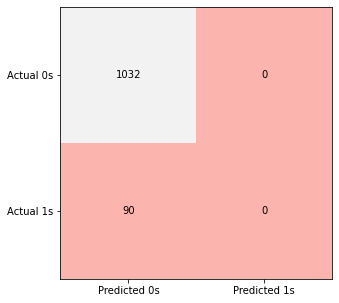

In [171]:
cxgb = confusion_matrix(y_test, xgb_test.predict(X_test))

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cxgb,cmap ='Pastel1')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cxgb[i, j], ha='center', va='center', color='black')
plt.show()

In [172]:
print(classification_report(y_test, xgb_test.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1032
           1       0.00      0.00      0.00        90

    accuracy                           0.92      1122
   macro avg       0.46      0.50      0.48      1122
weighted avg       0.85      0.92      0.88      1122



C:\Users\Nelcy-Aflore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nelcy-Aflore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nelcy-Aflore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
print("Curva ROC - AUC del modelo:")
roc_auc_score(y_test,xgb_test.predict(X_test))

Curva ROC - AUC del modelo:


0.5